**SVM** is a binary classifier, it only separates into two groups.
* Perform linear and non-linear classification, regression also outlier detection
* classification of complex but small or medium dataset
* find best separating **hyperplane** referred to as decision boundary to separate two classes.

How does SVM classify?
* special linearly separable classfication cse
* linearly separable
* svm fits the decision boundary - largest margin etween the closest points for each class - **Maximum margin hyperplane(MMH)**



What is support vector?
* Vector have a magnitude and direction
*

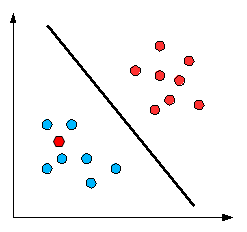

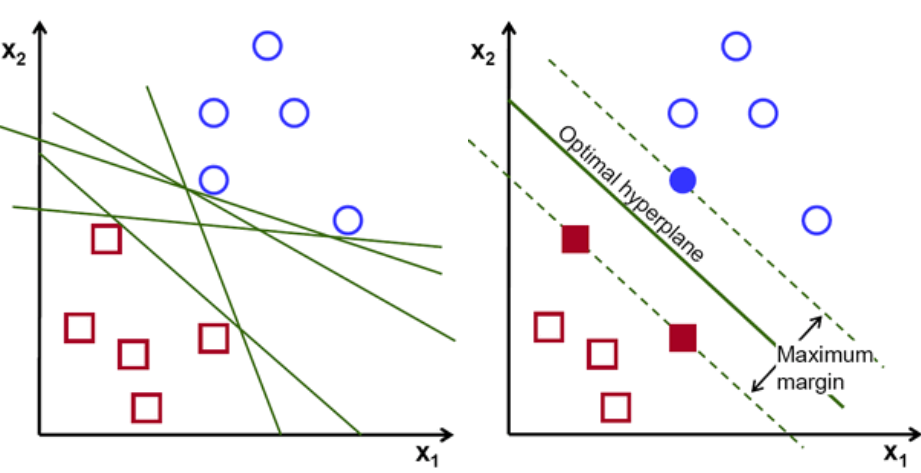

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
train = pd.read_csv("https://raw.githubusercontent.com/ezioauditore-tech/AI/main/datasets/Titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.drop(['PassengerId','Name','Ticket'],axis = 1,inplace = True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
train.shape

(891, 9)

In [ ]:
train[train.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,80.0,B28,NaN
829,1,1,female,62.0,0,0,80.0,B28,NaN


In [ ]:
train[train.Cabin.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,3,female,26.0,0,0,7.9250,NaN,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
7,0,3,male,2.0,3,1,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,NaN,S
885,0,3,female,39.0,0,5,29.1250,NaN,Q
886,0,2,male,27.0,0,0,13.0000,NaN,S
888,0,3,female,NaN,1,2,23.4500,NaN,S


In [ ]:
train[train.Age.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
5,0,3,male,NaN,0,0,8.4583,NaN,Q
17,1,2,male,NaN,0,0,13.0000,NaN,S
19,1,3,female,NaN,0,0,7.2250,NaN,C
26,0,3,male,NaN,0,0,7.2250,NaN,C
28,1,3,female,NaN,0,0,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,NaN,C
863,0,3,female,NaN,8,2,69.5500,NaN,S
868,0,3,male,NaN,0,0,9.5000,NaN,S
878,0,3,male,NaN,0,0,7.8958,NaN,S


In [ ]:
train.drop(['Cabin'],axis=1,inplace=True)
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked']= train['Embarked'].fillna('C')
train.Sex=train.Sex.replace(['male','female'],[0,1])
train.Embarked=train.Embarked.replace(['S','C','Q'],[0,1,2])

In [ ]:
train.dropna(inplace=True)

In [ ]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/ezioauditore-tech/AI/main/datasets/Titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.drop(['Cabin'],axis=1,inplace=True)
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Embarked']= test['Embarked'].fillna('C')
test.Sex=test.Sex.replace(['male','female'],[0,1])
test.Embarked=test.Embarked.replace(['S','C','Q'],[0,1,2])

In [ ]:
test.dropna(inplace=True)

In [ ]:
features = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

In [ ]:
C = 0.7
clf = svm.SVC(kernel='linear',C=C).fit(train[features],train['Survived'])

In [ ]:
prediction = clf.predict(test[features])

TypeError: ignored